In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

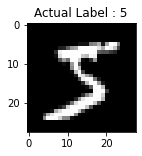

In [ ]:
img_id = 0
plt.figure(figsize=(2,2))
plt.imshow(x_train[img_id], cmap='gray')
plt.title(f"Actual Label : {y_train[img_id]}")
plt.show()

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# Converting the dataset (60000, 28, 28) into a flattend array of size (60000,784) 

x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
# One hot encoding Target variables
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

### Build Neural Network

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(392, input_dim = 784))
model.add(Dense(196, activation='relu'))
model.add(Dense(10, activation='softmax')) # Because multilclass classification problem

In [ ]:
model.compile(optimizer='adagrad',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
model.fit(x=x_train,
         y=y_train_ohe,
         batch_size=2000,
         epochs=30,
         validation_data=(x_test,y_test_ohe))

Epoch 1/30
30/30 [==============================] - 4s 95ms/step - loss: 23.4905 - accuracy: 0.6800 - val_loss: 6.8216 - val_accuracy: 0.8215
Epoch 2/30
30/30 [==============================] - 2s 81ms/step - loss: 6.2158 - accuracy: 0.8384 - val_loss: 4.9161 - val_accuracy: 0.8616
Epoch 3/30
30/30 [==============================] - 3s 90ms/step - loss: 4.7073 - accuracy: 0.8671 - val_loss: 4.1063 - val_accuracy: 0.8795
Epoch 4/30
30/30 [==============================] - 4s 145ms/step - loss: 3.9095 - accuracy: 0.8837 - val_loss: 3.6234 - val_accuracy: 0.8878
Epoch 5/30
30/30 [==============================] - 5s 156ms/step - loss: 3.3985 - accuracy: 0.8931 - val_loss: 3.3005 - val_accuracy: 0.8960
Epoch 6/30
30/30 [==============================] - 4s 147ms/step - loss: 3.0304 - accuracy: 0.9012 - val_loss: 3.0703 - val_accuracy: 0.9011
Epoch 7/30
30/30 [==============================] - 4s 145ms/step - loss: 2.7503 - accuracy: 0.9067 - val_loss: 2.8704 - val_accuracy: 0.9075
Epoch 8/

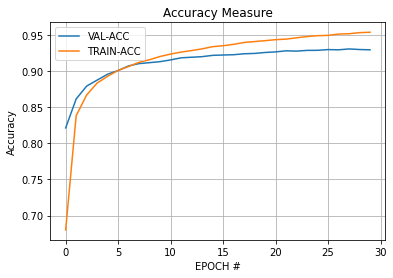

In [ ]:
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['accuracy'])
plt.legend(['VAL-ACC', 'TRAIN-ACC'])
plt.title("Accuracy Measure")
plt.xlabel("EPOCH #")
plt.ylabel("Accuracy")
# plt.xticks(ticks = range(0,30), labels = range(1,31))
plt.grid()
plt.show()

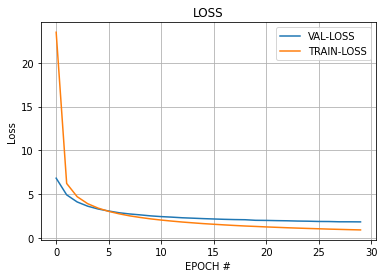

In [ ]:
plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['loss'])
plt.legend(['VAL-LOSS', 'TRAIN-LOSS'])
plt.title("LOSS")
plt.xlabel("EPOCH #")
plt.ylabel("Loss")
plt.grid()
plt.show()

#### Predictions

In [ ]:
import numpy as np

In [ ]:
x_test[500].reshape(-1,784).shape

(1, 784)

In [ ]:
pred = model.predict(x_test[500].reshape(-1,784))

1/1 [==============================] - 0s 85ms/step


In [ ]:
pred

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(pred)

3

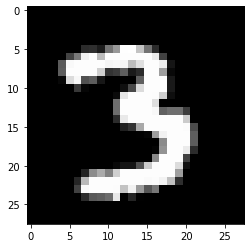

In [ ]:
plt.imshow(x_test[500].reshape(28,28), cmap='gray')
plt.show()